In [1]:
# IMPORT Everything here
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import ast
import re
#from Iconfig import api_Key
#from Iconfig import api_READ_token
import json

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
movie_metadata_path = "Resources/movies_metadata.csv"


movie_metadata = pd.read_csv(movie_metadata_path, low_memory = False)


movie_metadata.head(20)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,To

In [40]:
# Cleaning Data
movie_metadata_df =  movie_metadata[["title", "imdb_id", "genres", "release_date", "budget", "revenue", "runtime", "vote_average", "vote_count", "production_companies","popularity"]]

# Custom function to extract company names from JSON strings
def extract_and_join_company_names(json_str):
    if pd.notnull(json_str):
        names = re.findall(r"'name': '([^']*)'", json_str)
        return ', '.join(names)  # Join the company names into a single string separated by ', '
    else:
        return "Unknown"
    
# Apply the custom function to the 'production_companies' column
movie_metadata_df.loc[:, "production_companies"] = movie_metadata_df["production_companies"].apply(lambda x: extract_and_join_company_names(x))


# Custom function to extract and join genre names from JSON strings
def extract_and_join_genre_names(json_str):
    if pd.notnull(json_str):
        genres = re.findall(r"'name': '([^']*)'", json_str)
        return ', '.join(genres)  # Join the genre names into a single string separated by ', '
    else:
        return "Unknown"  # Return "Unknown" if the JSON string is empty or NaN

# Use .apply with a lambda function and .loc for the assignment
movie_metadata_df.loc[:, "genres"] = movie_metadata_df["genres"].apply(lambda x: extract_and_join_genre_names(x))


movie_metadata_df.head(10)



,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies,popularity
0,Toy Story,tt0114709,"Animation, Comedy, Family",1995-10-30,30000000,373554033.0,81.0,7.7,5415.0,Pixar Animation Studios,21.946943
1,Jumanji,tt0113497,"Adventure, Fantasy, Family",1995-12-15,65000000,262797249.0,104.0,6.9,2413.0,"TriStar Pictures, Teitler Film, Interscope Com...",17.015539
2,Grumpier Old Men,tt0113228,"Romance, Comedy",1995-12-22,0,0.0,101.0,6.5,92.0,"Warner Bros., Lancaster Gate",11.7129
3,Waiting to Exhale,tt0114885,"Comedy, Drama, Romance",1995-12-22,16000000,81452156.0,127.0,6.1,34.0,Twentieth Century Fox Film Corporation,3.859495
4,Father of the Bride Part II,tt0113041,Comedy,1995-02-10,0,76578911.0,106.0,5.7,173.0,"Sandollar Productions, Touchstone Pictures",8.387519
5,Heat,tt0113277,"Action, Crime, Drama, Thriller",1995-12-15,60000000,187436818.0,170.0,7.7,1886.0,"Regency Enterprises, Forward Pass, Warner Bros.",17.924927
6,Sabrina,tt0114319,"Comedy, Romance",1995-12-15,58000000,0.0,127.0,6.2,141.0,"Paramount Pictures, Scott Rudin Productions, M...",6.677277
7,Tom and Huck,tt0112302,"Action, Adventure, Drama, Family",1995-12-22,0,0.0,97.0,5.4,45.0,Walt Disney Pictures,2.561161
8,Sudden Death,tt0114576,"Action, Adventure, Thriller",1995-12-22,35000000,64350171.0,106.0,5.5,174.0,"Universal Pictures, Imperial Entertainment, Si...",5.23158
9,GoldenEye,tt0113189,"Adventure, Action, Thriller",1995-11-16,58000000,352194034.0,130.0,6.6,1194.0,"United Artists, Eon Productions",14.686036


In [5]:
## We only want movies between 2007 and 2017 that people paid to see  ##
movie_metadata_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2005-01-01") & (movie_metadata_df["release_date"] <= "2018-12-31") & (movie_metadata_df["revenue"] != 0), :]


movie_metadata_df.head(20)




,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies,popularity
4356,Camille Claudel 1915,tt2018086,Drama,2013-03-13,3512454,115860.0,95.0,7.0,20.0,"Canal+, Arte France Cinéma, 3B Productions, C....",0.134014
9352,A Sound of Thunder,tt0318081,"Thriller, Science Fiction, Adventure, Action",2005-05-15,80000000,5989640.0,110.0,4.8,111.0,"Epsilon Motion Pictures, Franchise Pictures, B...",4.980191
9441,The Jacket,tt0366627,"Drama, Mystery, Thriller, Fantasy",2005-03-04,29000000,21126225.0,103.0,6.8,459.0,"Section Eight, Mandalay Pictures, VIP 3 Medien...",12.092096
9442,Millions,tt0366777,"Comedy, Crime, Drama",2005-04-08,0,6584159.0,98.0,6.3,106.0,Mission Pictures,4.66886
9460,The Interpreter,tt0373926,"Crime, Thriller",2005-04-08,80000000,162944923.0,128.0,6.2,400.0,"Universal Pictures, StudioCanal, Mirage Enterp...",12.047671
9475,The Ring Two,tt0377109,"Drama, Horror, Thriller",2005-03-17,50000000,161451538.0,110.0,5.5,646.0,"DreamWorks, BenderSpink, Parkes+MacDonald Imag...",16.15818
9510,A Scanner Darkly,tt0405296,"Animation, Science Fiction, Thriller",2006-05-25,8700000,7659918.0,100.0,6.8,540.0,"Thousand Words, Warner Independent Pictures (W...",11.643026
9536,Charlie and the Chocolate Factory,tt0367594,"Adventure, Comedy, Family, Fantasy",2005-07-13,150000000,474968763.0,115.0,6.7,3759.0,"Village Roadshow Pictures, The Zanuck Company,...",22.038405
9559,White Noise,tt0375210,"Drama, Horror, Thriller",2005-01-07,10000000,91196419.0,101.0,5.6,267.0,"Universal Pictures, Brightlight Pictures, Endg...",6.143324
9617,Elektra,tt0357277,"Action, Fantasy",2005-01-13,43000000,56681566.0,97.0,4.9,590.0,"Twentieth Century Fox Film Corporation, Regenc...",13.802674


In [6]:
print(f"The movie database contains {len(movie_metadata_df)} movies that match our criteria.")

The movie database contains 3613 movies that match our criteria.


In [7]:

### Just for fun, separated movies by release year ###
    ## Note that the numerals denote year of data ##

moviesVII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2007-01-01") & (movie_metadata_df["release_date"] <= "2007-12-31"), :]
moviesVIII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2008-01-01") & (movie_metadata_df["release_date"] <= "2008-12-31"), :]
moviesIX_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2009-01-01") & (movie_metadata_df["release_date"] <= "2009-12-31"), :]
moviesX_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2010-01-01") & (movie_metadata_df["release_date"] <= "2010-12-31"), :]
moviesXI_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2011-01-01") & (movie_metadata_df["release_date"] <= "2011-12-31"), :]
moviesXII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2012-01-01") & (movie_metadata_df["release_date"] <= "2012-12-31"), :]
moviesXIII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2013-01-01") & (movie_metadata_df["release_date"] <= "2013-12-31"), :]
moviesXIV_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2014-01-01") & (movie_metadata_df["release_date"] <= "2014-12-31"), :]
moviesXV_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2015-01-01") & (movie_metadata_df["release_date"] <= "2015-12-31"), :]
moviesXVI_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2016-01-01") & (movie_metadata_df["release_date"] <= "2016-12-31"), :]
moviesXVII_df = movie_metadata_df.loc[ (movie_metadata_df["release_date"] >= "2017-01-01") & (movie_metadata_df["release_date"] <= "2017-12-31"), :]




In [8]:
# Here's how many movies this csv catalogues per year, from 2007 to 2017 ##
movieYearList = [len(moviesVII_df["imdb_id"]), len(moviesVIII_df["imdb_id"]), len(moviesIX_df["imdb_id"]), len(moviesX_df["imdb_id"]), len(moviesXI_df["imdb_id"]), len(moviesXII_df["imdb_id"]), len(moviesXIII_df["imdb_id"]), len(moviesXIV_df["imdb_id"]), len(moviesXV_df["imdb_id"]), len(moviesXVI_df["imdb_id"]), len(moviesXVII_df["imdb_id"]) ]
movieYearList


[258, 266, 284, 306, 312, 305, 337, 321, 310, 299, 98]

In [9]:
# Number of movies produced by each production company

In [84]:
# Explode the 'production_companies' column to separate rows for each company
exploded_df = movie_metadata_df.explode('production_companies')

# Group the DataFrame by production companies and count the number of movies produced by each company
company_movie_count = exploded_df.groupby('production_companies')['title'].count()

# Sort the results in descending order
company_movie_count = company_movie_count.sort_values(ascending=False)


company_movie_count_df = company_movie_count.reset_index(name='movie_count')
print(company_movie_count_df.head(11))

                      production_companies  movie_count
0                                                 11935
1                             Warner Bros.         1250
2                Metro-Goldwyn-Mayer (MGM)         1076
3                       Paramount Pictures         1003
4   Twentieth Century Fox Film Corporation          836
5                       Universal Pictures          830
6            Columbia Pictures Corporation          450
7                                   Canal+          438
8                        Columbia Pictures          431
9                       RKO Radio Pictures          301
10                          United Artists          279


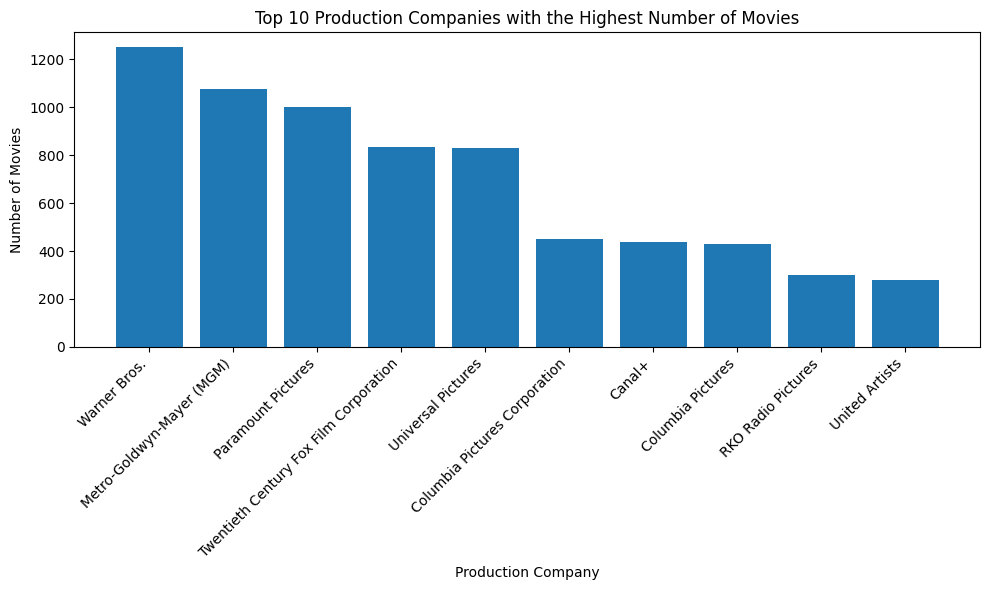

In [74]:
# Filter out rows where 'production_companies' are empty
filtered_df = company_movie_count_df[company_movie_count_df['production_companies'] != '']

#Visualization
top_10_companies = filtered_df.head(10)

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['production_companies'], top_10_companies['movie_count'])
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.title('Top 10 Production Companies with the Highest Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Sum of popularity scores of all the movies produced by each company

In [85]:
# Clean the 'popularity' column and convert it to numeric using .loc
movie_metadata_df.loc[:, 'popularity'] = pd.to_numeric(movie_metadata_df['popularity'], errors='coerce')

# Drop rows with no values from the 'popularity' column
movie_metadata_df = movie_metadata_df.dropna(subset=['popularity'])

# Explode the 'production_companies' column to separate rows for each company
exploded_df = movie_metadata_df.explode('production_companies')

# Group the DataFrame by production companies and calculate the sum of popularity scores
company_popularity_sum = exploded_df.groupby('production_companies')['popularity'].sum()

# Editing
company_popularity_sum = company_popularity_sum.sort_values(ascending=False)
company_popularity_sum_df = company_popularity_sum.reset_index(name='popularity_sum')
print(company_popularity_sum_df.head(11))

                      production_companies  popularity_sum
0                                             10438.853746
1                             Warner Bros.     7794.439013
2                       Universal Pictures     6414.921252
3                       Paramount Pictures     5673.155150
4   Twentieth Century Fox Film Corporation     5259.636535
5                     Walt Disney Pictures     3320.722160
6                        Columbia Pictures     3227.213446
7                Metro-Goldwyn-Mayer (MGM)     3144.211262
8                          New Line Cinema     2402.804838
9                                   Canal+     2076.704992
10           Columbia Pictures Corporation     1796.246356


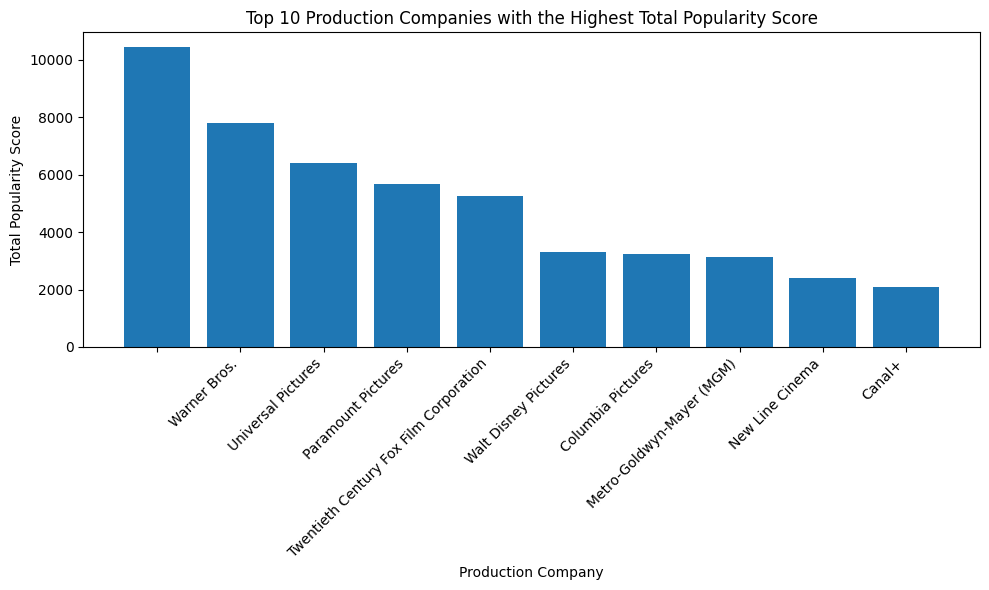

In [72]:
# Visualization
top_n_companies = 10
top_companies = company_popularity_sum.head(top_n_companies)

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_companies.index, top_companies.values)
plt.xlabel('Production Company')
plt.ylabel('Total Popularity Score')
plt.title(f'Top {top_n_companies} Production Companies with the Highest Total Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Average of popularity scores of all the movies produced by each company

In [86]:
# Clean the 'popularity' column and convert it to numeric
movie_metadata_df['popularity'] = pd.to_numeric(movie_metadata_df['popularity'], errors='coerce')

# Drop rows with NaN values in the 'popularity' column
movie_metadata_df.dropna(subset=['popularity'], inplace=True)

# Explode the 'production_companies' column to separate rows for each company
exploded_df = movie_metadata_df.explode('production_companies')

# Group the DataFrame by production companies and calculate the average of popularity scores
company_popularity_avg = exploded_df.groupby('production_companies')['popularity'].mean()

# Editing
company_popularity_avg = company_popularity_avg.sort_values(ascending=False)
company_popularity_avg = company_popularity_avg.reset_index(name='popularity_avg')
print(company_popularity_avg.head(11))

                production_companies  popularity_avg
0                   TENCENT PICTURES      294.337037
1                     DefyNite Films      183.870374
2              Cruel & Unusual Films      162.886458
3                     Wanda Pictures      157.320335
4               Artemple - Hollywood      154.801009
5             Deluxe Digital Studios      145.882135
6   Vita-Ray Dutch Productions (III)      145.882135
7                      Kinberg Genre      108.286507
8                       Image Nation       88.439243
9                    Double Negative       85.933840
10            Steven Paul Production       68.726676


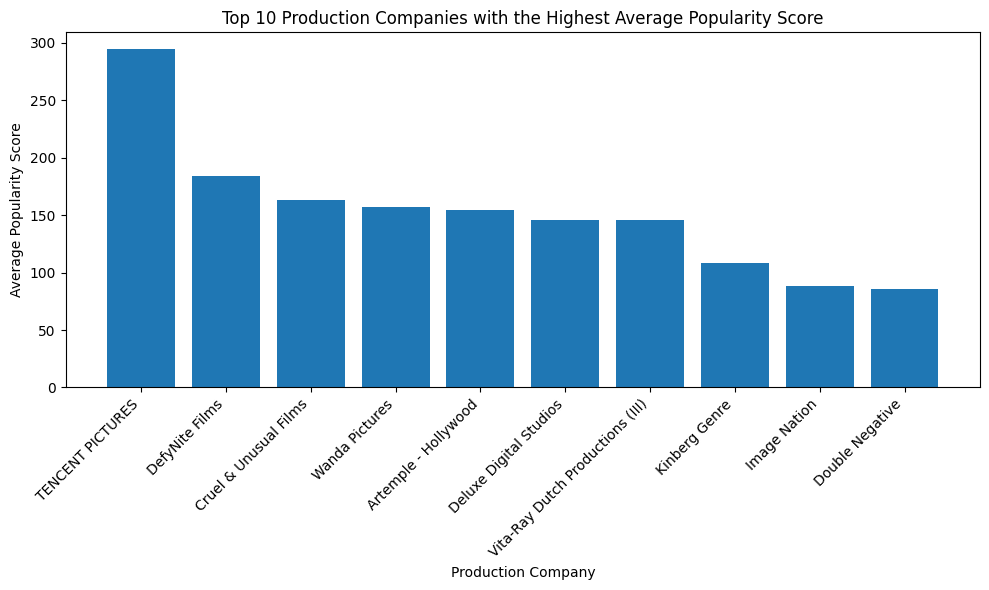

In [82]:
# Visualization
top_n_companies = 10
top_companies = filtered_popularity_avg_df.head(top_n_companies)

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_companies['production_companies'], top_companies['popularity_avg'])
plt.xlabel('Production Company')
plt.ylabel('Average Popularity Score')
plt.title(f'Top {top_n_companies} Production Companies with the Highest Average Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()